In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
orginalData = pd.read_csv("Data.csv")
orginalData

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CUST00996,4,Mumbai,New,ORD000996,00:10:16,4043.83,Wallet,5,15,Yes,Shirts,SKU0996,XXL,In Stock,Google Ads,38
996,CUST00997,1,Chennai,New,ORD000997,00:43:04,3531.79,Credit Card,2,0,No,T-Shirts,SKU0997,S,In Stock,Facebook Ads,44
997,CUST00998,49,Delhi,Returning,ORD000998,00:38:23,3129.50,Net Banking,4,20,Yes,Jackets,SKU0998,XL,In Stock,Instagram,77
998,CUST00999,40,Mumbai,Returning,ORD000999,00:54:47,1934.51,Net Banking,2,20,No,Shirts,SKU0999,XXL,In Stock,Word of Mouth,80


In [3]:
data = orginalData.copy()
data.head()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,00:04:52,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,00:39:38,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,00:15:19,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,00:52:58,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,00:17:40,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0


In [4]:
data.columns

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_date', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status',
       'product_category', 'product_sku', 'size', 'inventory_status', 'source',
       'engagement_score'],
      dtype='object')

In [5]:
data = data[['customer_tenure', 'customer_location', 'customer_type', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status', 'product_category', 'size', 'inventory_status', 'source', 'engagement_score']]
data.head()

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,size,inventory_status,source,engagement_score
0,39,Delhi,Returning,4015.21,Net Banking,9,5,No,Jackets,XXL,In Stock,Word of Mouth,36
1,52,Hyderabad,Returning,2205.61,Credit Card,3,15,No,T-Shirts,S,Out of Stock,Google Ads,37
2,29,Pune,Returning,858.84,Net Banking,8,30,No,T-Shirts,L,In Stock,Email Marketing,95
3,15,Jaipur,Returning,500.00,UPI,1,0,No,T-Shirts,XXL,In Stock,Word of Mouth,10
4,43,Pune,Returning,1843.50,Wallet,9,40,Yes,Sweatshirts,L,In Stock,Word of Mouth,0


In [6]:
numericalFeature = [col for col in data.columns if data[col].dtype != 'O']
numericalFeature

['customer_tenure',
 'order_value',
 'order_frequency',
 'discount_applied',
 'engagement_score']

In [7]:
categoricalFeatures =  [col for col in data.columns if data[col].dtype == 'O']
categoricalFeatures

['customer_location',
 'customer_type',
 'payment_method',
 'return_status',
 'product_category',
 'size',
 'inventory_status',
 'source']

In [8]:
ordinalEncoder = OrdinalEncoder()

for col in categoricalFeatures:
    data[col] = ordinalEncoder.fit_transform(data[[col]])

In [9]:
robustScaler = RobustScaler()

for col in numericalFeature:
    data[col] = robustScaler.fit_transform(data[[col]])

In [10]:
data

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,size,inventory_status,source,engagement_score
0,0.233333,2.0,1.0,0.746105,2.0,1.00,-0.4,0.0,1.0,4.0,0.0,4.0,-0.30
1,0.666667,3.0,1.0,-0.169916,1.0,-0.50,0.0,0.0,5.0,2.0,1.0,2.0,-0.28
2,-0.100000,7.0,1.0,-0.851653,2.0,0.75,0.6,0.0,5.0,0.0,0.0,0.0,0.88
3,-0.566667,4.0,1.0,-1.033298,3.0,-1.00,-0.6,0.0,5.0,4.0,0.0,4.0,-0.82
4,0.366667,7.0,1.0,-0.353217,4.0,1.00,1.0,1.0,4.0,0.0,0.0,4.0,-1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.933333,6.0,0.0,0.760592,4.0,0.00,0.0,1.0,3.0,4.0,0.0,2.0,-0.26
996,-1.033333,1.0,0.0,0.501397,1.0,-0.75,-0.6,0.0,5.0,2.0,0.0,1.0,-0.14
997,0.566667,2.0,1.0,0.297758,2.0,-0.25,0.2,1.0,1.0,3.0,0.0,3.0,0.52
998,0.266667,6.0,1.0,-0.307148,2.0,-0.75,0.2,0.0,3.0,4.0,0.0,4.0,0.58


In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

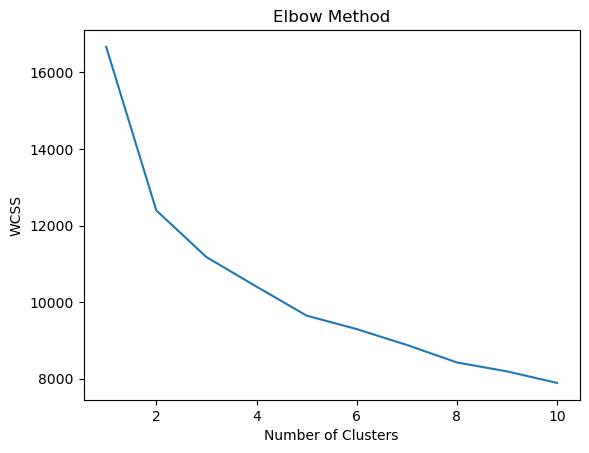

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(data)
data.sample(10)

,customer_tenure,customer_location,customer_type,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,size,inventory_status,source,engagement_score,cluster
353,0.900000,3.0,1.0,-1.033298,0.0,-0.25,-0.6,0.0,0.0,0.0,0.0,3.0,0.70,0
647,-0.533333,1.0,1.0,0.751724,0.0,-1.00,0.0,0.0,3.0,0.0,0.0,4.0,-0.70,0
137,0.033333,7.0,1.0,1.118846,1.0,-0.50,-0.4,0.0,3.0,2.0,0.0,3.0,0.68,1
503,0.133333,3.0,1.0,0.006525,4.0,0.50,0.4,1.0,1.0,3.0,0.0,1.0,-0.40,0
369,-0.700000,5.0,0.0,0.369036,2.0,0.25,-0.2,0.0,5.0,3.0,0.0,1.0,-0.32,1
330,-0.233333,6.0,1.0,0.010757,3.0,-0.50,-0.4,0.0,0.0,2.0,0.0,1.0,-0.84,1
615,-0.666667,0.0,0.0,-0.301063,0.0,0.00,0.2,1.0,2.0,2.0,0.0,0.0,-0.34,0
34,-0.233333,7.0,1.0,0.334887,0.0,0.75,0.2,1.0,5.0,0.0,0.0,1.0,0.54,1
296,-0.333333,3.0,1.0,0.262622,3.0,-0.75,0.6,1.0,5.0,2.0,0.0,3.0,-0.92,0
853,0.800000,5.0,1.0,-0.787153,3.0,0.75,1.0,0.0,1.0,0.0,0.0,0.0,0.06,1


In [14]:
cluster_summary = data.groupby('cluster').agg({
    'customer_tenure': 'mean',
    'order_value': 'mean',
    'order_frequency': 'mean',
    'discount_applied': 'mean',
    'engagement_score': 'mean'
}).reset_index()

cluster_summary

,cluster,customer_tenure,order_value,order_frequency,discount_applied,engagement_score
0,0,-0.022789,0.046924,-0.002041,-0.012653,-0.022286
1,1,-0.030392,0.013750,0.017647,-0.009804,-0.000745


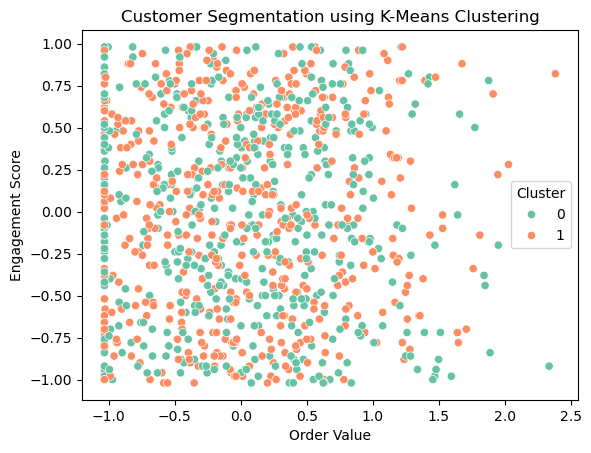

In [15]:
sns.scatterplot(data=data, x='order_value', y='engagement_score', hue='cluster', palette='Set2')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Order Value')
plt.ylabel('Engagement Score')
plt.legend(title='Cluster')
plt.show()